In [57]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.utils.data

In [58]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [59]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = .01

In [60]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples._next_data()
print(samples.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


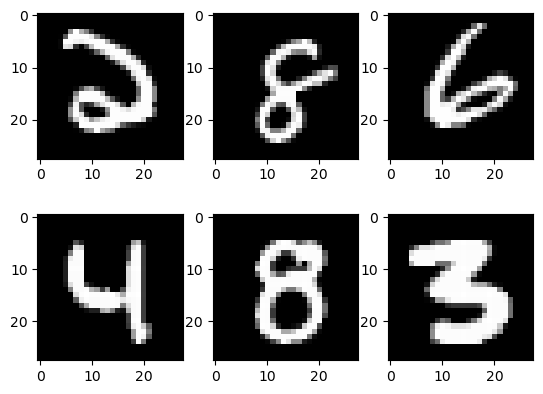

In [61]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [62]:
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # because of cross entropy we do not need softmax
        return out

model = NN(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adadelta(model.parameters(), lr=learning_rate)


In [63]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        output = model(images)

        l = criterion(output, labels)

        optimizer.zero_grad()

        l.backward()

        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1} / {num_epochs}, step {i+1} / {total_step}, loss= {l.item():.4f}")

epoch 1 / 2, step 100 / 100, loss= 2.1855
epoch 2 / 2, step 100 / 100, loss= 2.0446
epoch 3 / 2, step 100 / 100, loss= 1.9157
epoch 4 / 2, step 100 / 100, loss= 1.7614
epoch 5 / 2, step 100 / 100, loss= 1.5612


In [64]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        output = model(images)

        _, prediction = torch.max(output, 1)

        n_samples += labels.shape[0]

        n_correct = (prediction == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f"accuracy:{acc}")

accuracy:0.71
